<a href="https://colab.research.google.com/github/Dhanya-Zac/NLP/blob/main/LSTM_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
import numpy as np

In [5]:
#Sample documents
documents=[" This is the first document.","This document is the second document.","And this is the third one.","Is this the first document?"]

Binary classification for sentiment analysis using LSTM

In [14]:
labels=np.array([1,0,1,0]) #1 for positive, 0 for negative
#tokenize the texts
tokenizer=Tokenizer()
#Computers and machine learning models can't directly understand text. Tokenization converts text into numerical data
tokenizer.fit_on_texts(documents)
word_index=tokenizer.word_index
vocab_size=len(word_index)+1


In [15]:
#convert texts to sequences
sequences=tokenizer.texts_to_sequences(documents)

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [17]:
#pad sequences to make equal length
max_length=max(len(seq) for seq in sequences)
padded_sequences=pad_sequences(sequences,maxlen=max_length,padding='post')

In [18]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 16))#, input_length=max_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(padded_sequences, labels, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 0.6933
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.6929
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.6924
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7500 - loss: 0.6920
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7500 - loss: 0.6915
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.6911
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7500 - loss: 0.6906
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7500 - loss: 0.6900
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7500 - loss: 0.6895
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7500 - loss: 0.6889


It tokenizes the input documents, converts them to sequences, and paths the sequences to ensure equal length. The LSTM layer captures sequential information and the final dense layer produces binary classification predictions.

LSTM (Long Short-Term Memory) networks are a type of recurrent neural network (RNN) designed to capture sequential dependencies in text. Here's a breakdown of its architecture:

Cells: LSTMs consist of a series of cells, each responsible for maintaining the cell state and hidden state.
Gates: Each cell has three gates to control the flow of information:
Forget Gate: Decides what information to discard from the cell state.
Input Gate: Determines what new information to add to the cell state.
Output Gate: Controls the output based on the cell state and the input.


These gates help LSTMs manage long-term dependencies and prevent issues like vanishing or exploding gradients, making them effective for tasks like text classification and sentiment analysis.

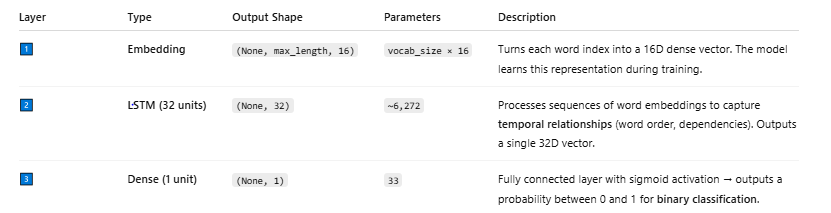